# OLS with Statsmodels

See the statsmodels OLS examples [here](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html)


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)


## Generate some noisy features and input parameters

array([[0.00000000e+00, 0.00000000e+00],
       [1.00100100e-02, 1.00200300e-04],
       [2.00200200e-02, 4.00801202e-04],
       ...,
       [9.97997998e+00, 9.96000004e+01],
       [9.98998999e+00, 9.97999000e+01],
       [1.00000000e+01, 1.00000000e+02]])

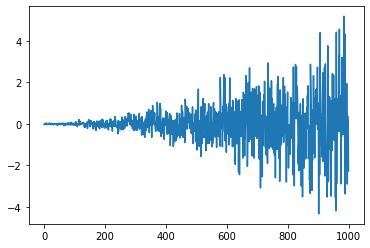

In [5]:
nsample = 1000
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))

# e = np.random.normal(size=nsample)

e = np.random.normal(size=nsample) * (x + x**2 + 1)
e = e/e.std()

plt.plot(e)
X

In [3]:
X[:10,:] # the non-constant features look like this

array([[0.        , 0.        ],
       [0.01001001, 0.0001002 ],
       [0.02002002, 0.0004008 ],
       [0.03003003, 0.0009018 ],
       [0.04004004, 0.0016032 ],
       [0.05005005, 0.00250501],
       [0.06006006, 0.00360721],
       [0.07007007, 0.00490981],
       [0.08008008, 0.00641282],
       [0.09009009, 0.00811622]])

## Generate a linear model

\begin{align}
y = \mu + {\bf X}{\bf \beta} + \varepsilon
\end{align}
or if we absorb the constant term $\mu$ into the definition of $\beta$ and $X$:

\begin{align}
y = {\bf X}{\bf \beta} + \varepsilon
\end{align}

In [4]:
X = sm.add_constant(X)
beta = np.array([1, 0.1, 10])

X[:10,:]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 5.00500501e-02, 2.50500751e-03],
       [1.00000000e+00, 6.00600601e-02, 3.60721081e-03],
       [1.00000000e+00, 7.00700701e-02, 4.90981472e-03],
       [1.00000000e+00, 8.00800801e-02, 6.41281923e-03],
       [1.00000000e+00, 9.00900901e-02, 8.11622433e-03]])

In [5]:

y = np.dot(X, beta) + e # The linear model

y[:10]


array([0.98328516, 1.03409262, 1.01545702, 1.001603  , 1.08081883,
       1.03869759, 1.02212553, 1.04389361, 1.07923578, 1.08937078])

## Instantiate an OLS model and fit it

In [6]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.450e+07
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:14:23   Log-Likelihood:                -1418.8
No. Observations:                1000   AIC:                             2844.
Df Residuals:                     997   BIC:                             2858.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0254      0.095     10.815      0.0

## Obtain fitted parameters

### beta

In [7]:
beta_fit = results.params
beta, beta_fit

(array([ 1. ,  0.1, 10. ]), array([ 1.02539027,  0.07880683, 10.00185749]))

## confidence intervals of our estimates of beta

In [8]:
results.conf_int()

array([[ 8.39341380e-01,  1.21143915e+00],
       [-7.13085628e-03,  1.64744508e-01],
       [ 9.99353713e+00,  1.00101779e+01]])

## confidence of our model parameter estimates: t-stats

In [9]:
results.tvalues

array([1.08152796e+01, 1.79951651e+00, 2.35892511e+03])

# Robust regression

In [10]:
model = sm.OLS(y, X)
robust_results = model.fit(cov_type='HC0')
print(robust_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.470e+07
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:14:23   Log-Likelihood:                -1418.8
No. Observations:                1000   AIC:                             2844.
Df Residuals:                     997   BIC:                             2858.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0254      0.047     21.888      0.0

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.450e+07
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:14:23   Log-Likelihood:                -1418.8
No. Observations:                1000   AIC:                             2844.
Df Residuals:                     997   BIC:                             2858.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0254      0.095     10.815      0.0